# Probelm Statement

1) Prepare a classification model using Naive Bayes

for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship --

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual


# Step 1: Import Required libraries

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading and Data Preprocessing

In [12]:
# train_path = 'https://raw.githubusercontent.com/ShrikantUppin/Naive-Bayes/main/CSV_FILES_%26_Problem_Statements/SalaryData_Train.csv'
# test_path = 'https://raw.githubusercontent.com/ShrikantUppin/Naive-Bayes/main/CSV_FILES_%26_Problem_Statements/SalaryData_Test.csv'

# train_data = pd.read_csv(train_path, error_bad_lines=False)
# test_data = pd.read_csv(test_path, error_bad_lines=False)

In [136]:
train_data = pd.read_csv('SalaryData_Train.csv')
validation_data = pd.read_csv('SalaryData_Test.csv')

In [137]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [138]:
validation_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [139]:
# checking shape of train dataset
print('train_data_shape',train_data.shape)
print('validation_data_shape',validation_data.shape)

train_data_shape (30161, 14)
validation_data_shape (15060, 14)


In [140]:
# checking info & null values, na etc

print(train_data.info())
print('-'*100)
print(validation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [141]:
# checking is column names of given train & test datasets are same or different

train_data.columns == validation_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

 ### Checking unique values from train & test data 

In [25]:
# selecting only object datatype columns

def unique_value_equality(datafeed1, datafeed2):
    
    '''this funcion takes two datasets as inputs. And selcts object datatypes columns 
    from both datasets. And on next level it compares each unique value from each column of both
    dataset & returns inner statement from function i.e. uboth datasets have unique values are not..!
    '''
    
    column_values1 = datafeed1[datafeed1.select_dtypes(include=object).columns].values.ravel()
    unique_values1 =  np.unique(column_values1)
    
    column_values2 = datafeed2[datafeed2.select_dtypes(include=object).columns].values.ravel()
    unique_values2 =  np.unique(column_values2)
    
    if False in unique_values1 == unique_values2:
        print('Both datasets unique values are not matched')
    else:
        print('"go ahead..! Both datasets unique values are matched"')

In [142]:
unique_value_equality(train_data, validation_data)

"go ahead..! Both datasets unique values are matched"


In [27]:
# checking for total unique values counts in train & test dataset.

def unique_value_counts(datafeed):
    for i in datafeed.select_dtypes(include=object).columns:
        print(i,'{}:'.format(' '*(13-len(i))),datafeed.select_dtypes(include=object)[i].nunique())

In [143]:
unique_value_counts(train_data)

workclass     : 7
education     : 16
maritalstatus : 7
occupation    : 14
relationship  : 6
race          : 5
sex           : 2
native        : 40
Salary        : 2


 ## Categorical data handling 

In [29]:
 # from above output columns Salary & sex can be encoded with get_dummies method 
 # and all other with lable encoding or cat.codes

In [144]:
X = train_data.drop(['Salary'], axis=1)
Y = pd.DataFrame(data=train_data.Salary, columns=['Salary'])

X_val = validation_data.drop(['Salary'], axis=1)
Y_val = pd.DataFrame(data=validation_data.Salary, columns=['Salary'])

In [145]:
X['sex'] = pd.get_dummies(X_Train.sex, drop_first=True) 
X_val['sex'] = pd.get_dummies(X_val.sex, drop_first=True)

In [146]:
Y['Salary'] = pd.get_dummies(Y, drop_first=True) 
Y_val['Salary'] = pd.get_dummies(Y_val, drop_first=True)

In [147]:
# label encoding

def label_encoding(datafeed):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in datafeed.select_dtypes(include=object).columns:
        datafeed[i]= label_encoder.fit_transform(datafeed.select_dtypes(include=object)[i]) 
        
    return datafeed.head()


In [148]:
label_encoding(X)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [149]:
label_encoding(X_val)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37


In [151]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_scalar = scalar.fit_transform(X)
X_val_scalar = scalar.fit_transform(X_val)

# Step 2: EDA

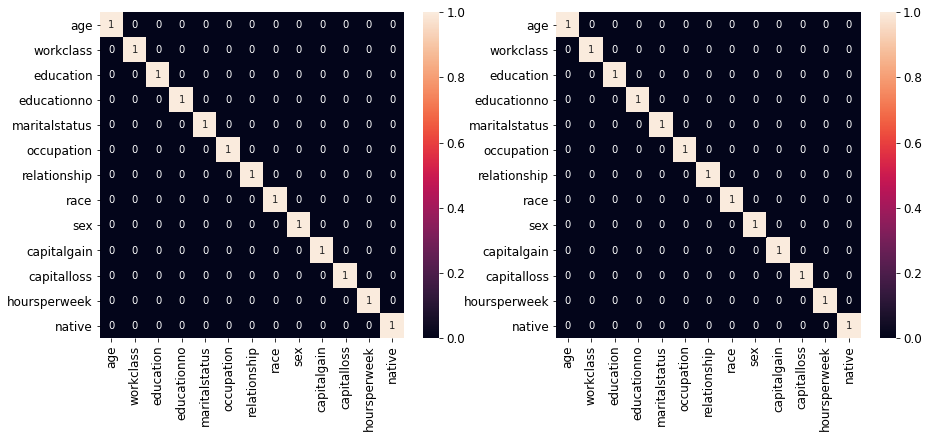

In [153]:
# 1. Correlation matrix: Since Gaussian Naive Bayes have assumption each variable is indepdent that is
#.......................there should not be correlation among them

figure, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
sns.heatmap(X.corr()>0.7, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(X_val.corr()>0.7, annot = True, fmt = 'g', ax = ax2)
plt.show()

 ## Checking for imbalance/balance/classe

In [155]:
Y.value_counts(normalize=True)

Salary
0         0.751069
1         0.248931
dtype: float64

In [154]:
Y_val.value_counts(normalize=True)

Salary
0         0.754316
1         0.245684
dtype: float64

Although it has same percentage ratio classes distribution in train & test dataset. It may will bais towards majority class. So will balance data using SMOTE tech.

# Step 3: Data splitting & Data class balance

In [158]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scalar, Y, test_size=0.33, random_state=42, stratify = Y)

In [159]:
# Data balance using SMOTE
 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

BEFORE BALNCING


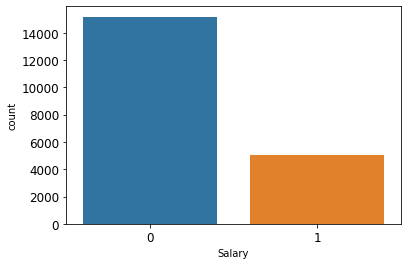

AFTER BALANCING


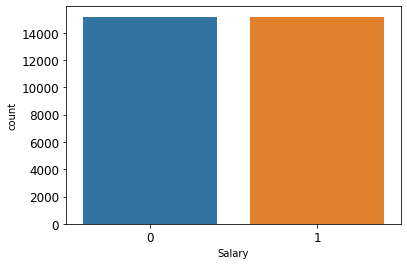

In [160]:
def data_balance_plot(imbalanced_Data, balanced_Data, column_name):
    data = [imbalanced_Data, balanced_Data]
    note = ['BEFORE BALNCING', 'AFTER BALANCING']
    count =note[0]
    for i in data:
        print(count)
        sns.countplot(x=column_name, data=i)
        plt.show()
        count = note[1]
                
data_balance_plot(y_train, y_train_smote, 'Salary')

# Step 4: Model Building

In [209]:
def GaussianNB_model_building(x_train, y_train, x_test, y_test, x_val, y_val):
   
    '''
    Docstring...
    ------------
    function use: this function performs GaussianNB operation on given 
    preprocessed depedent & indepdent datasets. And returns score, validation score, confusion matrix,
    classification reports etc.
    
    parameters:
    ----------
    x = indepedent variable dataset
    y = depedent variable dataset
    index_list = list of column index.
                 by default all columns of depedent variable dataset will be selected            
            
    '''
 
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.model_selection import cross_val_score
    
    model = GaussianNB()
    model = model.fit(x_train, y_train)
    
    
    # fit model on train datasets
    model.fit(x_train, y_train)
    
    global train_score, test_score, validation_scores
    # train & test scores i.e. accuracy
    train_score = model.score(x_train, y_train).round(3)
    test_score = model.score(x_test, y_test).round(3)
    
    # model prediction on x_train & x_test dataset
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)
    
    # confusion matrix
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)
    
    # classification report
    train_classification = classification_report(y_train, y_train)
    test_classification = classification_report(y_test, y_test)
    
    # TRAIN DATA OUTPUTS..
    print('TRAIN SCORE:', train_score)
    print()
    
    print('CONFUSION MATRIX FOR TRAIN DATA')
    figure1, ax1 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(train_cm, annot=True, ax = ax1, fmt = 'g')
    plt.show()
    print()
    
    print('Classification report for train data')
    print(train_classification)
    print('-'*100)
    print('-'*100)
    
     # TEST DATA OUTPUTS..
    print('TEST SCORE:', test_score)
    print()
    print('CONFUSION MATRIX FOR TEST DATA')
    figure, ax2 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(test_cm, annot=True, ax = ax2, fmt = 'g')
    plt.show()
    
    print('Classification report for test data')
    print(test_classification)
    print('-'*100)
    
    print('SUMMARY:','train score:',train_score,',', 'test score:', test_score)
    print('model_paramter:', model)
    
    print()
    print('-'*100)
    print('-'*100)
    
    # modelc cross validation...
    
    print('MODEL CROSS VALIDATION...................')
    from sklearn.model_selection import cross_val_score
    validation_scores = cross_val_score(model, x_val, y_val, cv=5)
    print(validation_scores)
    print()
    print('The mean score and the 95% confidence interval of the score estimate:')
    print()
    print("Accuracy: %0.2f (+/- %0.2f)" % (validation_scores.mean(), validation_scores.std() * 2)) 
    print()
    
    result_df = pd.DataFrame({'parameters':['train_score', 'test_score','validation_scores'],\
                         'score':[train_score, test_score,validation_scores.mean()]})
    
    return result_df
    



TRAIN SCORE: 0.797

CONFUSION MATRIX FOR TRAIN DATA


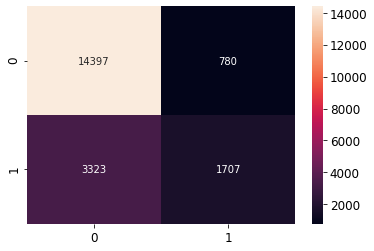

<Figure size 720x576 with 0 Axes>


Classification report for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15177
           1       1.00      1.00      1.00      5030

    accuracy                           1.00     20207
   macro avg       1.00      1.00      1.00     20207
weighted avg       1.00      1.00      1.00     20207

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
TEST SCORE: 0.798

CONFUSION MATRIX FOR TEST DATA


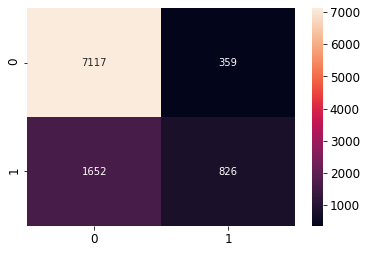

<Figure size 720x576 with 0 Axes>

Classification report for test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7476
           1       1.00      1.00      1.00      2478

    accuracy                           1.00      9954
   macro avg       1.00      1.00      1.00      9954
weighted avg       1.00      1.00      1.00      9954

----------------------------------------------------------------------------------------------------
SUMMARY: train score: 0.797 , test score: 0.798
model_paramter: GaussianNB()

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MODEL CROSS VALIDATION...................
[0.7998008  0.79448871 0.79448871 0.79880478 0.79581673]

The mean score and the 95% confidence interval of the score estimate:

Accuracy: 0.80 (+/- 0.00)



,parameters,score
0,train_score,0.79700
1,test_score,0.79800
2,validation_scores,0.79668


In [210]:
GaussianNB_model_building(x_train, y_train, x_test, y_test, X_val_scalar, Y_val)

# Rebuilding model with feature selection

no. of tress in ranodm forest: 100


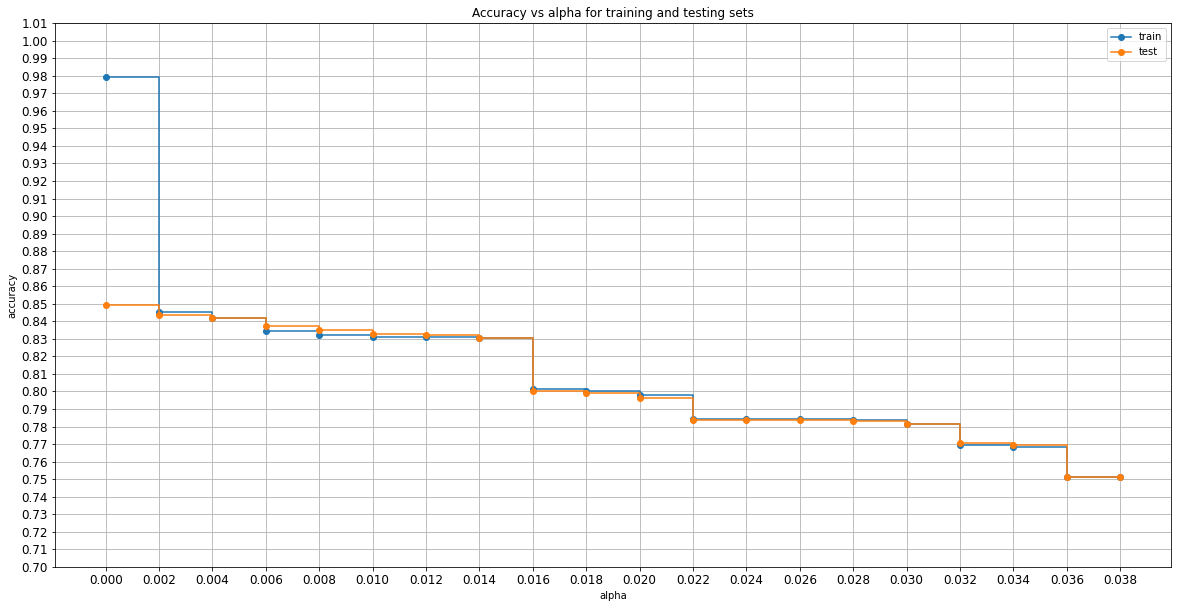

no. of tress in ranodm forest: 200


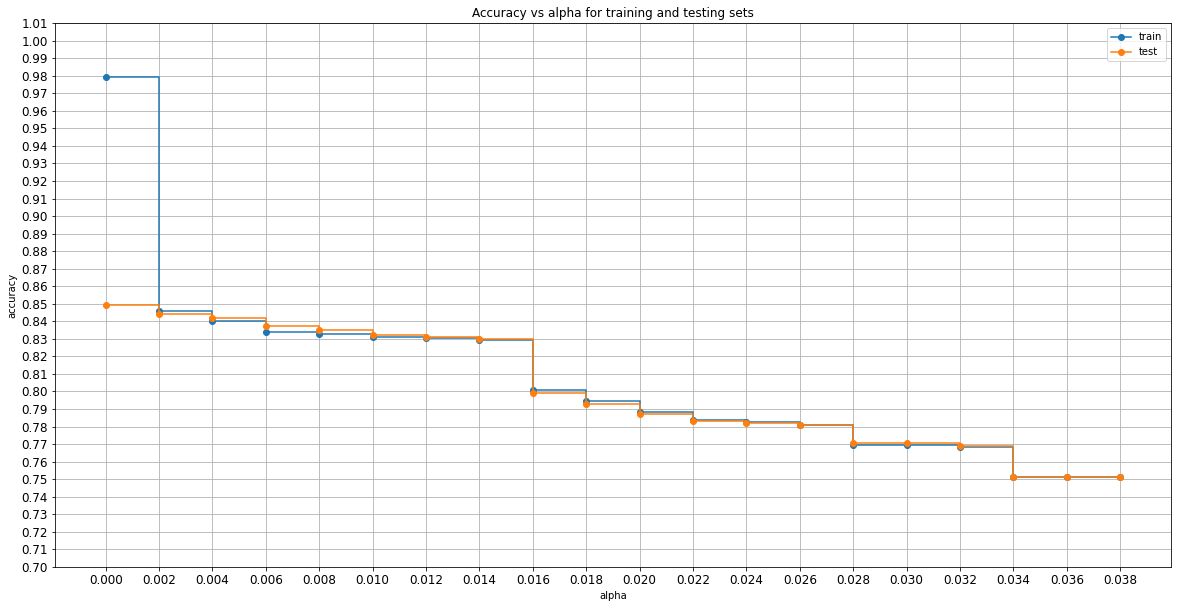

no. of tress in ranodm forest: 300


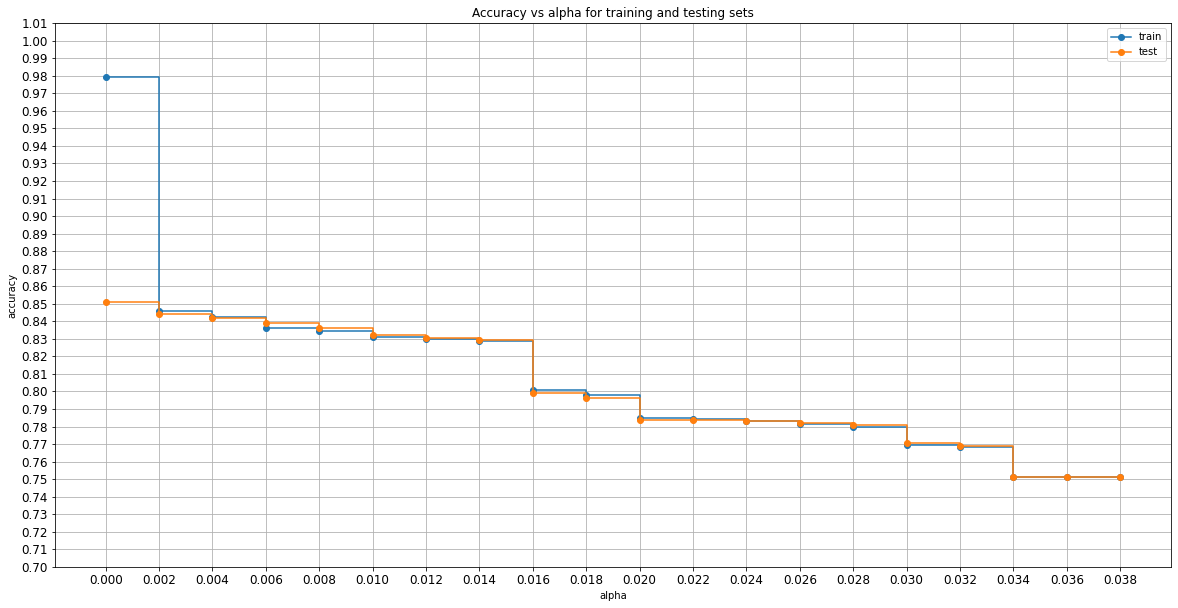

no. of tress in ranodm forest: 400


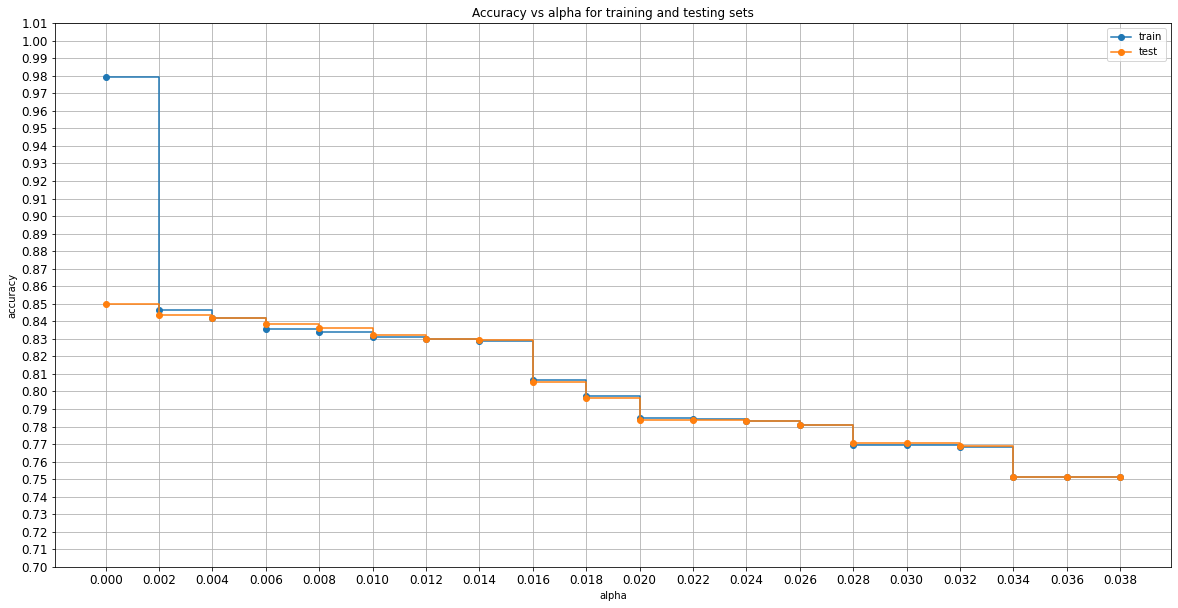

In [167]:
# running random forest independently to get best alpha value

def find_alpha(x_train, x_test, y_train, y_test):
    
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    
    for i in list(range(100,500,100)):
        print('no. of tress in ranodm forest:',i)
        ccp_alphas = np.arange(0.000, 0.040, 0.002)
        clfs = []
        for ccp_alpha in ccp_alphas:
            clf = RandomForestClassifier(n_estimators=i,random_state=42, ccp_alpha=ccp_alpha, n_jobs=-1)
            clf.fit(x_train, y_train)
            clfs.append(clf)

        train_scores = [clf.score(x_train, y_train) for clf in clfs]
        test_scores = [clf.score(x_test, y_test) for clf in clfs]

        fig, ax = plt.subplots(figsize=(20,10))
        ax.set_xlabel("alpha")
        ax.set_ylabel("accuracy")
        ax.set_title("Accuracy vs alpha for training and testing sets")
        ax.plot(ccp_alphas, train_scores, marker='o', label="train",
                drawstyle="steps-post")
        ax.plot(ccp_alphas, test_scores, marker='o', label="test",
                drawstyle="steps-post")
        ax.set_xticks(np.arange(0.000,0.040, 0.002))
        ax.set_yticks(np.arange(0.70,1.01, 0.01))
        ax.legend()
        plt.grid(True)
        plt.rcParams['xtick.labelsize']=12
        plt.rcParams['ytick.labelsize']=12
        plt.show()

find_alpha(x_train, x_test, y_train, y_test)

above all graph shows overfitting issue so best value for random forest cc_alpha paramter is 0.0

In [169]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=100,random_state=42, ccp_alpha=0.0, n_jobs=-1)
selector = RFE(estimator, n_features_to_select=7, step=1)

selector = selector.fit(x_train,y_train)

In [170]:
feature_imp = pd.DataFrame({'ranking':selector.ranking_, 'column_names':X_Test.columns,'main_index':range(len(X.columns))})

In [171]:
top_feature_list = []
for i in feature_imp.sort_values(by=['ranking']).head(10)['column_names']:
    top_feature_list.append(i)

In [173]:
final_features = feature_imp.sort_values(by=['ranking']).head(7)
final_features

,ranking,column_names,main_index
0,1,age,0
3,1,educationno,3
4,1,maritalstatus,4
5,1,occupation,5
6,1,relationship,6
9,1,capitalgain,9
11,1,hoursperweek,11


In [174]:
list1 = [i for i in final_features.main_index]
list1

[0, 3, 4, 5, 6, 9, 11]

TRAIN SCORE: 0.786

CONFUSION MATRIX FOR TRAIN DATA


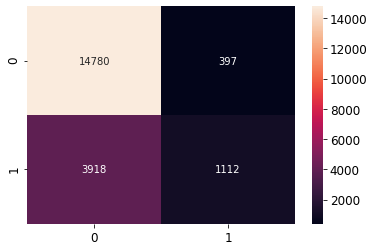

<Figure size 720x576 with 0 Axes>


Classification report for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15177
           1       1.00      1.00      1.00      5030

    accuracy                           1.00     20207
   macro avg       1.00      1.00      1.00     20207
weighted avg       1.00      1.00      1.00     20207

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
TEST SCORE: 0.788

CONFUSION MATRIX FOR TEST DATA


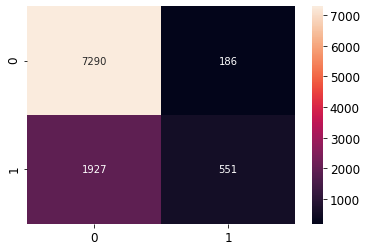

<Figure size 720x576 with 0 Axes>

Classification report for test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7476
           1       1.00      1.00      1.00      2478

    accuracy                           1.00      9954
   macro avg       1.00      1.00      1.00      9954
weighted avg       1.00      1.00      1.00      9954

----------------------------------------------------------------------------------------------------
SUMMARY: train score: 0.786 , test score: 0.788
model_paramter: GaussianNB()

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MODEL CROSS VALIDATION...................
[0.79017264 0.78486056 0.78818061 0.78386454 0.7938247 ]

The mean score and the 95% confidence interval of the score estimate:

Accuracy: 0.79 (+/- 0.01)



,parameters,score
0,train_score,0.786000
1,test_score,0.788000
2,validation_scores,0.788181


In [211]:
GaussianNB_model_building(x_train[:,list1], y_train, x_test[:,list1], y_test, X_val_scalar[:,list1], Y_val)

# Conclusion:

1. model accuracy is 0.79

2. After doing feature selection there is no improvement in results. before 0.79 & after 0.79

3. Classification report doesn't shows analytical/confident report. Since its rounded to 1 if probability is equal to above 0.5

4. Used random forest for feature selection but it shows model overfitting values when ccp_alpha value set to above 0.0.
